In [1]:
!/gws/pw/j05/cop26_hackathons/bristol/install-kernel

Installed kernelspec cmip6 in /home/users/chebak/.local/share/jupyter/kernels/cmip6
Installed cmip6 Jupyter kernel for the hackathon


In [2]:
#import packages - works in CMIP6 notebook
from itertools import chain
from glob import glob
import matplotlib.tri as tri
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm 
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from palettable.cmocean.sequential import Algae_20
from palettable.cmocean.diverging import Balance_20
import numpy as np
from matplotlib.colors import BoundaryNorm

# Set some plotting defaults
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

In [3]:
#read in historical output
dataset = xr.open_mfdataset('/gws/pw/j05/cop26_hackathons/bristol/project03/output_nc/transeff_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_*.nc')

In [4]:
dataset

<xarray.Dataset>
Dimensions:    (i: 360, j: 330, time: 165)
Coordinates:
  * time       (time) object 1850-12-30 00:00:00 ... 2014-12-30 00:00:00
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 322 323 324 325 326 327 328 329
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float32 dask.array<chunksize=(330, 360), meta=np.ndarray>
    longitude  (j, i) float32 dask.array<chunksize=(330, 360), meta=np.ndarray>
Data variables:
    expc       (time, j, i) float32 dask.array<chunksize=(50, 330, 360), meta=np.ndarray>

In [5]:
#define function for a single spatial plot
def spatialplot(x, y, z, vmin, vmax, cbi, cblab, title): 
    
    # The following section interpolates from the weird grid to a regularly spaced lat lon grid.
    X = x.values.ravel()
    Y = y.values.ravel()
    Z = z.values.ravel()
    triangles = tri.Triangulation(X, Y)
    X_interp, Y_interp = np.meshgrid(np.linspace(-180, 180, 360), np.linspace(-90, 90, 330))
    interp_lin = tri.LinearTriInterpolator(triangles, Z)
    Z_interp = interp_lin(X_interp, Y_interp)


    #load land and create colorbar levels
    levls=np.arange(vmin,vmax,cbi)#arranging the colorbar levels

    land_10m = cfeature.NaturalEarthFeature('physical', 'land', '110m',
                                            edgecolor='face',
                                            facecolor=cfeature.COLORS['land'])


    #Plotting
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide(central_longitude=0))#change the projection here
    
    cmap=Algae_20.mpl_colormap #change colormap here
    norm = BoundaryNorm(levls, ncolors=cmap.N, clip=True)#normalising the colorbar to the specified levels
    plot=plt.pcolormesh(X_interp,Y_interp,Z_interp,
                        transform=ccrs.PlateCarree(),
                        cmap=cmap,
                        norm=norm,
                        vmin=vmin,
                        vmax=vmax)
    ax.add_feature(land_10m,facecolor='gray')
    ax.coastlines(resolution='110m')
    cb=plt.colorbar(plot,shrink=0.6,extend='max')#shrink colorbar relative to figure size, extend top of the colorbar
    cb.ax.set_ylabel(cblab)#set colorbar label
    plt.title(title)
    plt.show()

In [6]:
#calculate 2000s mean transfer efficiency
expc=dataset['expc']
expc_00s=expc.sel(time=slice("2000", "2009"))
print(expc_00s.shape)
expc_00s_mean=expc_00s.mean(axis=0)


(10, 330, 360)


In [7]:
#load in data and undertake any calculations/ unit conversions
#x=lon, y=lat, z= 2D xarray variable, vmin=colorbar min value, vmax=colorbar maximum value, cbi=colorbar intervals, cblab=colorbar label, title=plot title
x = dataset['longitude']
y = dataset['latitude']
z = expc_00s_mean
vmin=0
vmax=0.151
cbi=0.01
cblab='Transfer Efficiency'
title='UKESM1-historical-r1i1p1f2 - 2000s Mean'

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


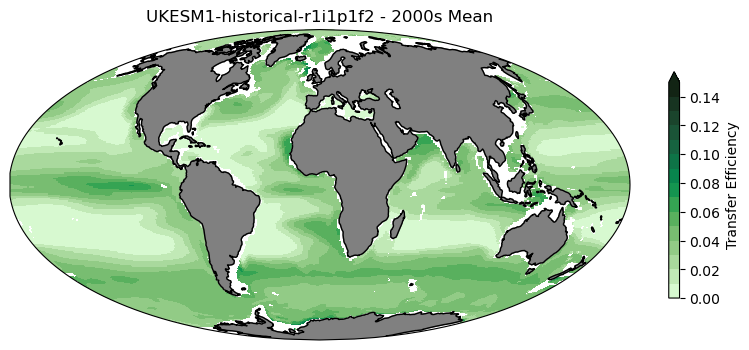

In [8]:
#run function
spatialplot(x,y,z,vmin,vmax,cbi,cblab,title)
#uncomment to save fig 
#plt.savefig("UKESM1_historical_r1i1p1f2_teff_00s_mean.jpg")

In [9]:
#read in piControl
dataset2 = xr.open_mfdataset('/gws/pw/j05/cop26_hackathons/bristol/project03/output_nc/transeff_Omon_UKESM1-0-LL_piControl_r1i1p1f2_gn_*.nc')

In [10]:
dataset2

<xarray.Dataset>
Dimensions:    (i: 360, j: 330, time: 190)
Coordinates:
  * time       (time) object 1960-12-30 00:00:00 ... 2149-12-30 00:00:00
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 322 323 324 325 326 327 328 329
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float32 dask.array<chunksize=(330, 360), meta=np.ndarray>
    longitude  (j, i) float32 dask.array<chunksize=(330, 360), meta=np.ndarray>
Data variables:
    expc       (time, j, i) float32 dask.array<chunksize=(40, 330, 360), meta=np.ndarray>

In [11]:
#calculate 2090s mean transfer efficiency - piControl
expc2=dataset2['expc']
expc_90s_piC=expc2.sel(time=slice("2090", "2099"))
expc_90s_piC_mean=expc_90s_piC.mean(axis=0)
print(expc_90s_piC_mean.shape)

(330, 360)


In [12]:
#load in data and undertake any calculations/ unit conversions
#x=lon, y=lat, z= 2D xarray variable, vmin=colorbar min value, vmax=colorbar maximum value, cbi=colorbar intervals, cblab=colorbar label, title=plot title
x = dataset2['longitude']
y = dataset2['latitude']
z = expc_90s_piC_mean
vmin=0
vmax=0.151
cbi=0.01
cblab='Transfer Efficiency'
title='UKESM1-piControl-r1i1p1f2 - 2090s Mean'

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


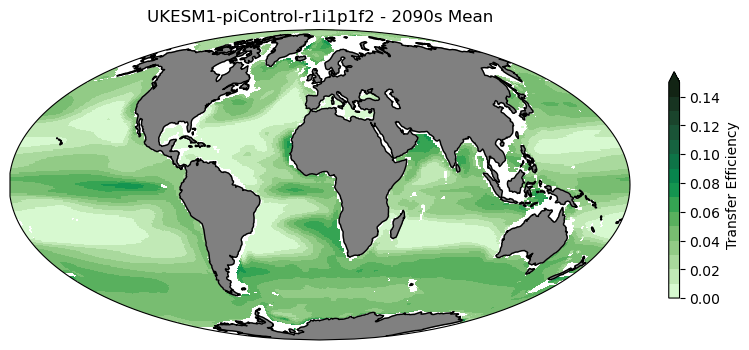

In [13]:
#run function
spatialplot(x,y,z,vmin,vmax,cbi,cblab,title)
#plt.savefig("UKESM1_piControl_r1i1p1f2_teff_90s_mean.jpg")

In [14]:
#read in ssp370
dataset3 = xr.open_mfdataset('/gws/pw/j05/cop26_hackathons/bristol/project03/output_nc/transeff_Omon_UKESM1-0-LL_ssp370_r1i1p1f2_gn_*.nc')

In [15]:
dataset3

<xarray.Dataset>
Dimensions:    (i: 360, j: 330, time: 86)
Coordinates:
  * time       (time) object 2015-12-30 00:00:00 ... 2100-12-30 00:00:00
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 322 323 324 325 326 327 328 329
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float32 dask.array<chunksize=(330, 360), meta=np.ndarray>
    longitude  (j, i) float32 dask.array<chunksize=(330, 360), meta=np.ndarray>
Data variables:
    expc       (time, j, i) float32 dask.array<chunksize=(35, 330, 360), meta=np.ndarray>

In [16]:
#calculate 2090s mean transfer efficiency for ssp370
expc3=dataset3['expc']
expc_90s_370=expc3.sel(time=slice("2090", "2099"))
expc_90s_370_mean=expc_90s_370.mean(axis=0)
print(expc_90s_370_mean.shape)

(330, 360)


In [17]:
#load in data and undertake any calculations/ unit conversions
#x=lon, y=lat, z= 2D xarray variable, vmin=colorbar min value, vmax=colorbar maximum value, cbi=colorbar intervals, cblab=colorbar label, title=plot title
x = dataset2['longitude']
y = dataset2['latitude']
z = expc_90s_370_mean
vmin=0
vmax=0.151
cbi=0.01
cblab='Transfer Efficiency'
title='UKESM1-ssp370-r1i1p1f2 - 2090s Mean'

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


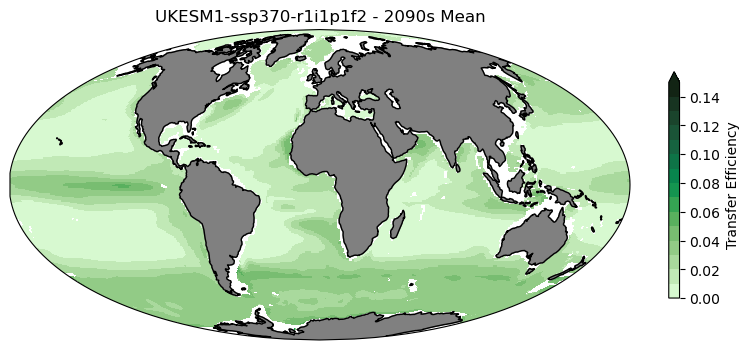

In [18]:
#run function
spatialplot(x,y,z,vmin,vmax,cbi,cblab,title)
#plt.savefig("UKESM1_ssp370_r1i1p1f2_teff_90s_mean.jpg")

In [19]:
#read in ssp585
dataset4 = xr.open_mfdataset('/gws/pw/j05/cop26_hackathons/bristol/project03/output_nc/transeff_Omon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_*.nc')

In [20]:
dataset4

<xarray.Dataset>
Dimensions:    (i: 360, j: 330, time: 86)
Coordinates:
  * time       (time) object 2015-12-30 00:00:00 ... 2100-12-30 00:00:00
  * j          (j) int32 0 1 2 3 4 5 6 7 8 ... 322 323 324 325 326 327 328 329
  * i          (i) int32 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
    latitude   (j, i) float32 dask.array<chunksize=(330, 360), meta=np.ndarray>
    longitude  (j, i) float32 dask.array<chunksize=(330, 360), meta=np.ndarray>
Data variables:
    expc       (time, j, i) float32 dask.array<chunksize=(35, 330, 360), meta=np.ndarray>

In [21]:
#calculate 2090s mean transfer efficiency for ssp370
expc4=dataset4['expc']
expc_90s_585=expc4.sel(time=slice("2090", "2099"))
expc_90s_585_mean=expc_90s_585.mean(axis=0)
print(expc_90s_585_mean.shape)

(330, 360)


In [22]:
#load in data and undertake any calculations/ unit conversions
#x=lon, y=lat, z= 2D xarray variable, vmin=colorbar min value, vmax=colorbar maximum value, cbi=colorbar intervals, cblab=colorbar label, title=plot title
x = dataset4['longitude']
y = dataset4['latitude']
z = expc_90s_585_mean
vmin=0
vmax=0.151
cbi=0.01
cblab='Transfer Efficiency'
title='UKESM1-ssp585-r1i1p1f2 - 2090s Mean'

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


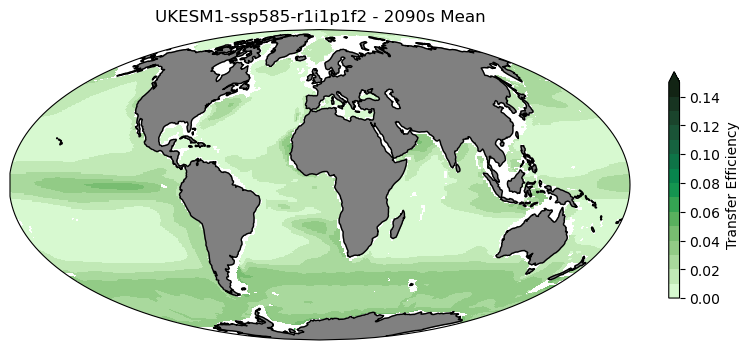

In [23]:
#run function
spatialplot(x,y,z,vmin,vmax,cbi,cblab,title)
#plt.savefig("UKESM1_ssp585_r1i1p1f2_teff_90s_mean.jpg")

In [24]:
#define function for a single spatial plot - difference
def spatialdiff(x, y, z, vmin, vmax, cbi, cblab, title): 
    
    # The following section interpolates from the weird grid to a regularly spaced lat lon grid.
    X = x.values.ravel()
    Y = y.values.ravel()
    Z = z.values.ravel()
    triangles = tri.Triangulation(X, Y)
    X_interp, Y_interp = np.meshgrid(np.linspace(-180, 180, 360), np.linspace(-90, 90, 330))
    interp_lin = tri.LinearTriInterpolator(triangles, Z)
    Z_interp = interp_lin(X_interp, Y_interp)


    #load land and create colorbar levels
    levls=np.arange(vmin,vmax,cbi)#arranging the colorbar levels

    land_10m = cfeature.NaturalEarthFeature('physical', 'land', '110m',
                                            edgecolor='face',
                                            facecolor=cfeature.COLORS['land'])


    #Plotting
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide(central_longitude=0))#change the projection here
    
    cmap=Balance_20.mpl_colormap #change colormap here
    norm = BoundaryNorm(levls, ncolors=cmap.N, clip=True)#normalising the colorbar to the specified levels
    plot=plt.pcolormesh(X_interp,Y_interp,Z_interp,
                        transform=ccrs.PlateCarree(),
                        cmap=cmap,
                        norm=norm,
                        vmin=vmin,
                        vmax=vmax)
    ax.add_feature(land_10m,facecolor='gray')
    ax.coastlines(resolution='110m')
    cb=plt.colorbar(plot,shrink=0.6,extend='both')#shrink colorbar relative to figure size, extend top of the colorbar
    cb.ax.set_ylabel(cblab)#set colorbar label
    plt.title(title)
    plt.show()

In [25]:
#calculate difference in transfer efficiency between the 2000s and 2090s for piControl
expcdiffpiC=expc_90s_piC_mean-expc_00s_mean


In [26]:
#load in data and undertake any calculations/ unit conversions
#x=lon, y=lat, z= 2D xarray variable, vmin=colorbar min value, vmax=colorbar maximum value, cbi=colorbar intervals, cblab=colorbar label, title=plot title
x = dataset2['longitude']
y = dataset2['latitude']
z = expcdiffpiC
vmin=-0.06
vmax=0.07
cbi=0.005
cblab='Transfer Efficiency'
title='UKESM1-piControl-r1i1p1f2 - 2090s-2000s Difference'

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


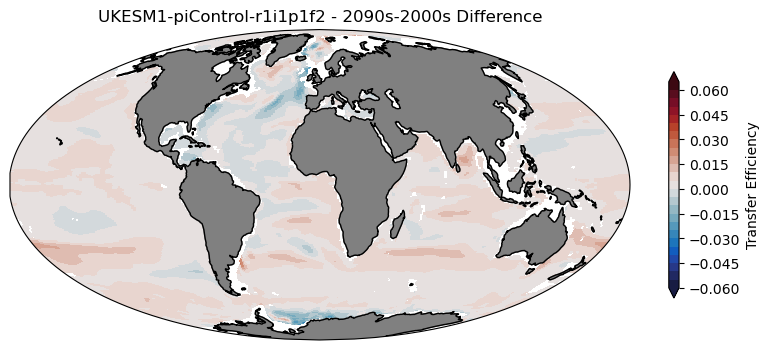

In [27]:
#run function
spatialdiff(x,y,z,vmin,vmax,cbi,cblab,title)
#plt.savefig("UKESM1_hist_piC_r1i1p1f2_teff_00s_90s_diff.jpg")

In [28]:
#calculate difference in transfer efficiency between the 2000s and 2090s for ssp370
expcdiff370=expc_90s_370_mean-expc_00s_mean


In [29]:
#load in data and undertake any calculations/ unit conversions
#x=lon, y=lat, z= 2D xarray variable, vmin=colorbar min value, vmax=colorbar maximum value, cbi=colorbar intervals, cblab=colorbar label, title=plot title
x = dataset2['longitude']
y = dataset2['latitude']
z = expcdiff370
vmin=-0.06
vmax=0.07
cbi=0.005
cblab='Transfer Efficiency'
title='UKESM1-ssp370-r1i1p1f2 - 2090s-2000s Difference'

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


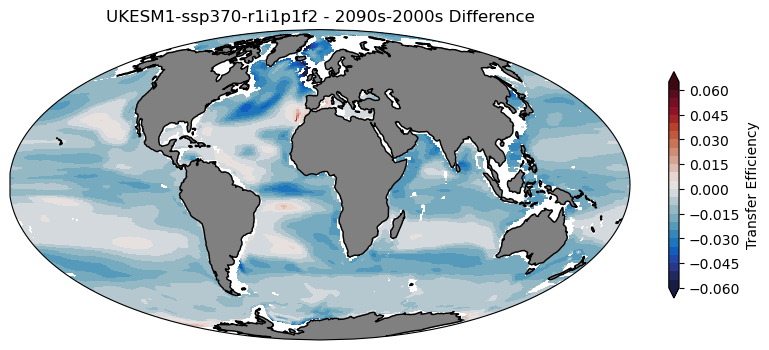

In [30]:
#run function
spatialdiff(x,y,z,vmin,vmax,cbi,cblab,title)
#plt.savefig("UKESM1_hist_ssp370_r1i1p1f2_teff_00s_90s_diff.jpg")

In [31]:
#calculate difference in transfer efficiency between the 2000s and 2090s for ssp585
expcdiff585=expc_90s_585_mean-expc_00s_mean

In [32]:
#load in data and undertake any calculations/ unit conversions
#x=lon, y=lat, z= 2D xarray variable, vmin=colorbar min value, vmax=colorbar maximum value, cbi=colorbar intervals, cblab=colorbar label, title=plot title
x = dataset2['longitude']
y = dataset2['latitude']
z = expcdiff585
vmin=-0.06
vmax=0.07
cbi=0.005
cblab='Transfer Efficiency'
title='UKESM1-ssp585-r1i1p1f2 - 2090s-2000s Difference'

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


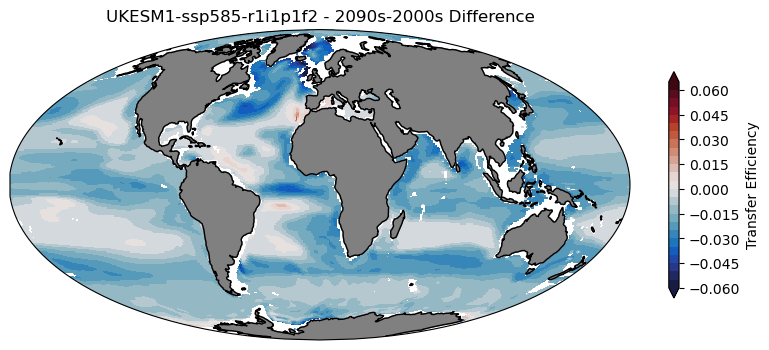

In [33]:
#run function
spatialdiff(x,y,z,vmin,vmax,cbi,cblab,title)
#plt.savefig("UKESM1_hist_ssp585_r1i1p1f2_teff_00s_90s_diff.jpg")